## DVC CA 1

## 1- Generate a plot that details the 5 top Companies by Revenue for each Decade. E.g., Top 5 for 1950-1959, 1960-1969, etc. This must be a single plot either static or interactive.

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [158]:
df = pd.read_csv("fortune500.csv")

In [159]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [160]:
df['Decade'] = df['Year'] // 10*10

Firstly in order to generate a plot for the table, the column "Decade" needs to be created, the formula used to define the decade was picking each Year and dividing by 10, the division rounds down to the nearest number multiple of 10, and after multiplying by 10 it puts back the zero therefore turning the year into its proper decade.

In [161]:
df.iloc[15000]

Year                            1985
Rank                               1
Company                  Exxon Mobil
Revenue (in millions)        90854.0
Profit (in millions)            5528
Decade                          1980
Name: 15000, dtype: object

In [162]:
df = df.sort_values(by='Revenue (in millions)', ascending=False)

In [163]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade
25000,2005,1,Wal-Mart Stores,288189.0,10267,2000
25001,2005,2,Exxon Mobil,270772.0,25330,2000
24500,2004,1,Wal-Mart Stores,258681.0,9054,2000
24000,2003,1,Wal-Mart Stores,246525.0,8039,2000
23500,2002,1,Wal-Mart Stores,219812.0,6671,2000


In [164]:
top_cmp_decade = df.groupby(['Decade']).apply(lambda x: x.drop_duplicates('Company').nlargest(5, 'Revenue (in millions)'))

In [165]:
top_cmp_decade

Year  Rank                  Company  Revenue (in millions)  \
Decade                                                                     
1950   500    1956     1           General Motors                12443.3   
       1501   1958     2              Exxon Mobil                 7830.2   
       1502   1958     3               Ford Motor                 5771.3   
       1503   1958     4               U.S. Steel                 4413.8   
       1504   1958     5         General Electric                 4335.7   
1960   7000   1969     1           General Motors                22755.4   
       7001   1969     2              Exxon Mobil                14091.3   
       7002   1969     3               Ford Motor                14075.1   
       7003   1969     4         General Electric                 8381.6   
       7004   1969     5                 Chrysler                 7445.3   
1970   12000  1979     1           General Motors                63221.1   
       12001  1979     2              Exxon Mobil                60334.5   
       12002  1979     3               Ford Motor                42784.1   
       12003  1979     4                    Mobil                34736.0   
       12004  1979     5                   Texaco                28607.5   
1980   17000  1989     1           General Motors               121085.0   
       13500  1982     1              Exxon Mobil               108107.7   
       17001  1989     2               Ford Motor                92446.0   
       13501  1982     2                    Mobil                64488.0   
       17003  1989     4  Intl. Business Machines                59681.0   
1990   21500  1998     1           General Motors               178174.0   
       21501  1998     2               Ford Motor               153627.0   
       22002  1999     3          Wal-Mart Stores               139208.0   
       21502  1998     3              Exxon Mobil               122379.0   
       22004  1999     5         General Electric               100469.0   
2000   25000  2005     1          Wal-Mart Stores               288189.0   
       25001  2005     2              Exxon Mobil               270772.0   
       24502  2004     3           General Motors               195645.2   
       23003  2001     4               Ford Motor               180598.0   
       25004  2005     5         General Electric               152363.0   

             Profit (in millions)  Decade  
Decade                                     
1950   500                 1189.5    1950  
       1501                 805.2    1950  
       1502                 282.8    1950  
       1503                 419.4    1950  
       1504                 247.9    1950  
1960   7000                1731.9    1960  
       7001                1276.7    1960  
       7002                 626.6    1960  
       7003                 357.1    1960  
       7004                 290.7    1960  
1970   12000                 3508    1970  
       12001                 2763    1970  
       12002               1588.9    1970  
       12003               1125.6    1970  
       12004                852.5    1970  
1980   17000                 4856    1980  
       13500               5567.5    1980  
       17001                 5300    1980  
       13501                 2433    1980  
       17003                 5806    1980  
1990   21500                 6698    1990  
       21501                 6920    1990  
       22002                 4430    1990  
       21502                 8460    1990  
       22004                 9296    1990  
2000   25000                10267    2000  
       25001                25330    2000  
       24502                 3822    2000  
       23003                 3467    2000  
       25004                16593    2000

In [166]:
top_cmp_decade = top_cmp_decade.reset_index(drop=True)

After Decade field is set, a variable to store the top companies by decade is set and used for the plots using lambda function to sort the groups by the revenue in millions while dropping duplicate names for companies in case the same company has first and second most revenue in the dataset. After sorting data index is reset to avoid duplicates in the field Decades.

In [167]:
top_cmp_decade

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade
0,1956,1,General Motors,12443.3,1189.5,1950
1,1958,2,Exxon Mobil,7830.2,805.2,1950
2,1958,3,Ford Motor,5771.3,282.8,1950
3,1958,4,U.S. Steel,4413.8,419.4,1950
4,1958,5,General Electric,4335.7,247.9,1950
5,1969,1,General Motors,22755.4,1731.9,1960
6,1969,2,Exxon Mobil,14091.3,1276.7,1960
7,1969,3,Ford Motor,14075.1,626.6,1960
8,1969,4,General Electric,8381.6,357.1,1960
9,1969,5,Chrysler,7445.3,290.7,1960


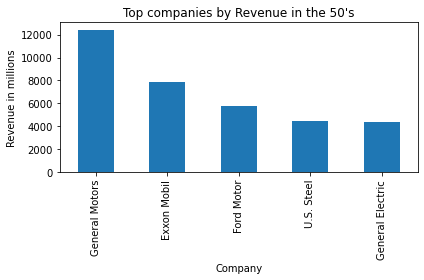

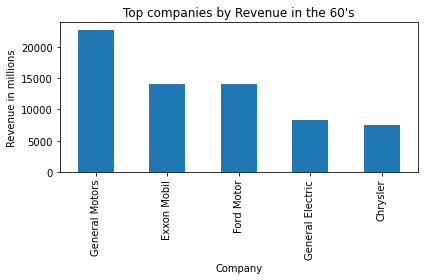

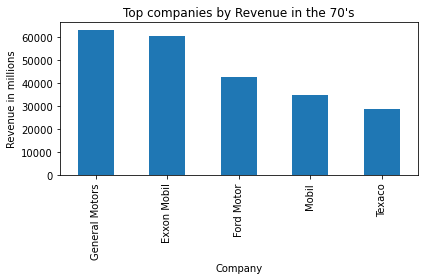

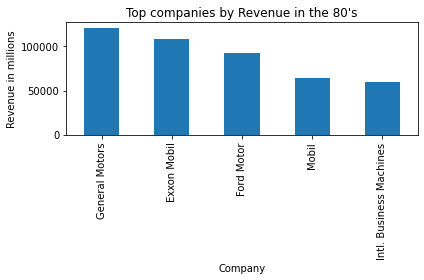

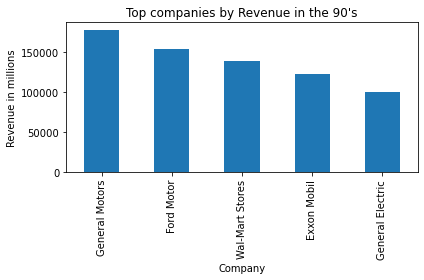

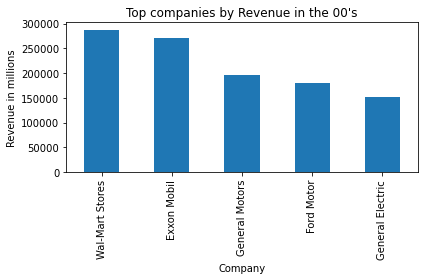

In [168]:
for decade, group in top_cmp_decade.groupby('Decade'):
    group.plot(x='Company', y='Revenue (in millions)', kind='bar', legend = False)
    plt.title(f'Top companies by Revenue in the {str(decade)[-2:]}\'s')
    plt.xlabel('Company')
    plt.ylabel('Revenue in millions')
    plt.tight_layout()
    plt.show()

Once data is organized, plot is generated in groups of top 5 based on the decade, x axis contains the name of the companies and y axis the revenue in millions, a bar chart seemed to be appropriate since the comparison is only among 5 companies, data is not crunched together and easy to read. Alternatively the use of pie chart was added for additional visualization.

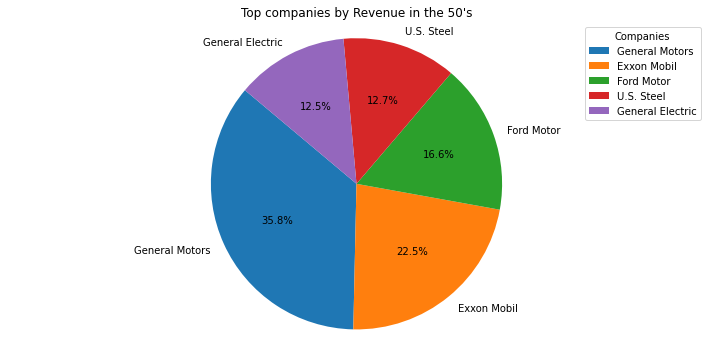

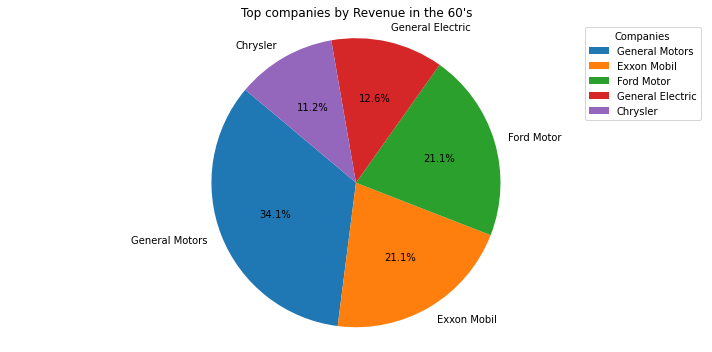

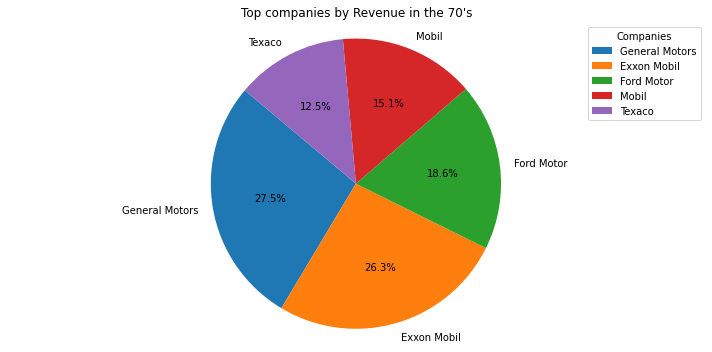

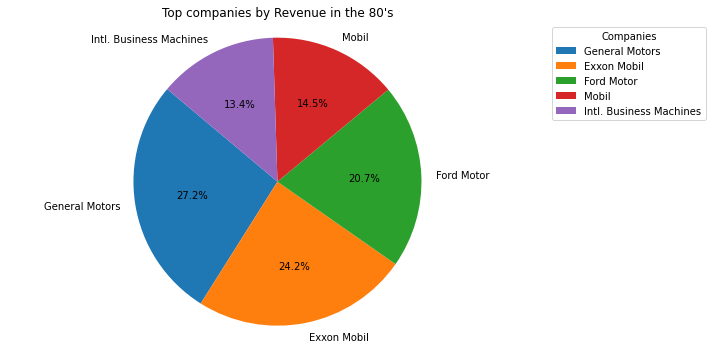

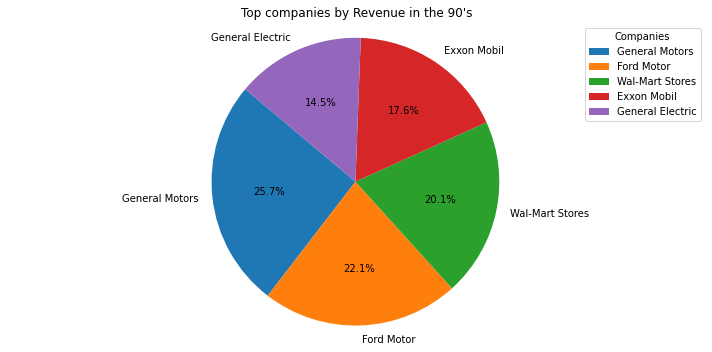

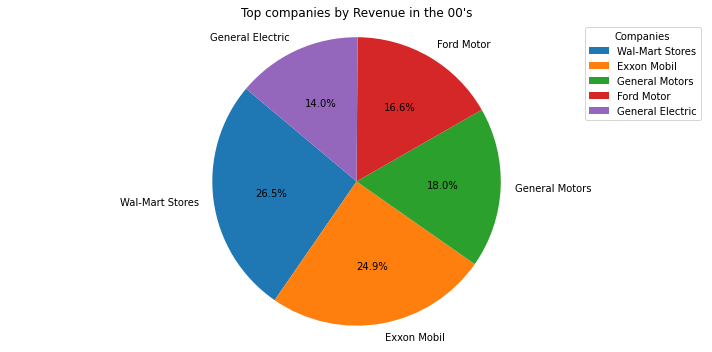

In [169]:
for decade, group in top_cmp_decade.groupby('Decade'):
    plt.figure(figsize=(10,5))
    plt.pie(group['Revenue (in millions)'], labels=group['Company'], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Top companies by Revenue in the {str(decade)[-2:]}\'s')
    plt.legend(group['Company'], bbox_to_anchor=(1,1), title='Companies')
    plt.tight_layout()
    plt.show()

## 2- Plot a graph depicting the distribution of the “Revenue” in the top 20 Companies in 1971.

In [170]:
df1971 = df[df['Year'] == 1971]

In [171]:
df1971

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade
8000,1971,1,General Motors,18752.4,609.1,1970
8001,1971,2,Exxon Mobil,16554.2,1309.5,1970
8002,1971,3,Ford Motor,14979.9,515.7,1970
8003,1971,4,General Electric,8726.7,328.5,1970
8004,1971,5,Intl. Business Machines,7504.0,1017.5,1970
...,...,...,...,...,...,...
8495,1971,496,General Refractories,169.4,4.7,1970
8496,1971,497,Athlone Industries,168.4,0.6,1970
8497,1971,498,Alberto-Culver,167.8,8.1,1970
8498,1971,499,Triangle Industries,166.7,0.5,1970


In [172]:
top_1971 = df1971.groupby(['Decade']).apply(lambda x: x.drop_duplicates('Company').nlargest(20, 'Revenue (in millions)'))

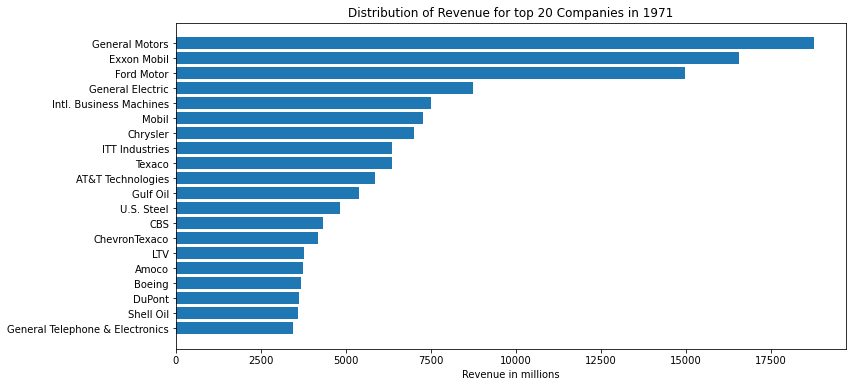

In [173]:
plt.figure(figsize=(12,6))
plt.barh(top_1971['Company'], top_1971['Revenue (in millions)'])
plt.xlabel('Revenue in millions')
plt.title('Distribution of Revenue for top 20 Companies in 1971')
plt.gca().invert_yaxis()
plt.show()

Using the same lambda formula from previous plot, data gets filtered by the year of 1971 and sorted in ascending order while dropping duplicated companies, bar chart displays a good vizualition putting the compaines in the y axis for better reading

## 3- Find out and visualize which Top 10 Company’s profit increased the most between 1990 and 1999. This Must be a Single plot either static or interactive.

To break down the task, firstly the profit of the companies between 1990 and 1999 to sort whichever is higher by grouping the data to be displayed on the year length required

In [174]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade
25000,2005,1,Wal-Mart Stores,288189.0,10267,2000
25001,2005,2,Exxon Mobil,270772.0,25330,2000
24500,2004,1,Wal-Mart Stores,258681.0,9054,2000
24000,2003,1,Wal-Mart Stores,246525.0,8039,2000
23500,2002,1,Wal-Mart Stores,219812.0,6671,2000


In [176]:
df['Profit (in millions)'].dtype

dtype('O')

In [177]:
df.loc[:, 'Profit (in millions)'] = pd.to_numeric(df['Profit (in millions)'], errors = 'coerce')

In order to clean the data the dataset which had its values as objects are converted to floats in order to be added up for the plots.

In [178]:
df['Profit (in millions)'].dtype

dtype('float64')

In [179]:
filtered_year = df[(df['Year'] >= 1990) & (df['Year'] <= 1999)]

In [180]:
filtered_year.sort_values(by='Company')

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade
19995,1994,496,3Com,617.2,38.6,1990
22302,1999,303,3Com,5420.4,30.2,1990
21954,1998,455,3Com,3147.1,374.0,1990
17531,1990,32,3M,11990.0,1244.0,1990
19027,1993,28,3M,13883.0,1233.0,1990
...,...,...,...,...,...,...
19816,1994,317,Zenith Electronics,1228.2,-97.0,1990
17668,1990,169,Zenith Electronics,2610.7,-68.4,1990
18781,1992,282,Zenith Electronics,1321.6,-51.6,1990
19303,1993,304,Zenith Electronics,1271.4,-105.9,1990


In [181]:
filtered_year['Profit (in millions)'].dtype

dtype('float64')

In [182]:
df.loc[:, 'Profit (in millions)'] = pd.to_numeric(df['Profit (in millions)'], errors = 'coerce')

In [183]:
filtered_year['Profit (in millions)'].dtype

dtype('float64')

In [184]:
profit_company = filtered_year.groupby('Company', as_index=False)['Profit (in millions)'].sum()

In [185]:
filtered_year.loc[df['Company'] == '3Com']

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade
22302,1999,303,3Com,5420.4,30.2,1990
21954,1998,455,3Com,3147.1,374.0,1990
19995,1994,496,3Com,617.2,38.6,1990


In [186]:
profit_company.loc[profit_company['Company'] == '3Com']

,Company,Profit (in millions)
0,3Com,442.8


In [187]:
profit_company.sort_values(by='Profit (in millions)', ascending=False)

,Company,Profit (in millions)
320,Exxon Mobil,58080.0
378,General Electric,55996.0
43,Altria Group,45682.0
354,Ford Motor,40465.1
592,Merck,29624.5
...,...,...
924,Unisys,-2483.7
603,Millennium Chemicals,-2516.0
355,Fort Howard,-2588.3
555,MCI WorldCom,-4386.4


Once data is clean and profit added to each company, the plots can be done for the top 10 companies between 1990 and 1999, additionally the last 10 companies from the same period length are also displayed.

In [188]:
top10_sort = profit_company.sort_values(by='Profit (in millions)', ascending=False).head(10)
bottom10_sort = profit_company.sort_values(by='Profit (in millions)', ascending=True).head(10)

In [191]:
fig = px.bar(top10_sort, x='Profit (in millions)', y = 'Company', orientation='h', title='Top 10 companies by profit between 1990 and 1999.')
fig2 = px.bar(bottom10_sort, x='Profit (in millions)', y = 'Company', orientation='h', title='Bottom 10 companies by profit between 1990 and 1999.')
fig2.update_traces(marker_color='red')
fig.show()
fig2.show()

## 4- Observe and plot the average revenue by decade. This Must be a Single plot either static or interactive.

In [190]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade
25000,2005,1,Wal-Mart Stores,288189.0,10267.0,2000
25001,2005,2,Exxon Mobil,270772.0,25330.0,2000
24500,2004,1,Wal-Mart Stores,258681.0,9054.0,2000
24000,2003,1,Wal-Mart Stores,246525.0,8039.0,2000
23500,2002,1,Wal-Mart Stores,219812.0,6671.0,2000


In [196]:
df['Revenue (in millions)'].dtype

dtype('float64')

In [198]:
df.dtypes

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)     float64
Decade                     int64
dtype: object

In [199]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit', 'decade']

In [217]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit', 'decade']].groupby('decade')
avg_rev_decade = df.groupby('decade')['revenue'].mean()

By setting each column with a simpler name to handle the data a group is separated only displaying the fields specified by year, revenue, profit and decade, the mean values are sorted by decade.

In [218]:
avg_rev_decade

decade
1950      335.052440
1960      549.356380
1970     1522.210720
1980     3483.964660
1990     7351.898740
2000    14531.707367
Name: revenue, dtype: float64

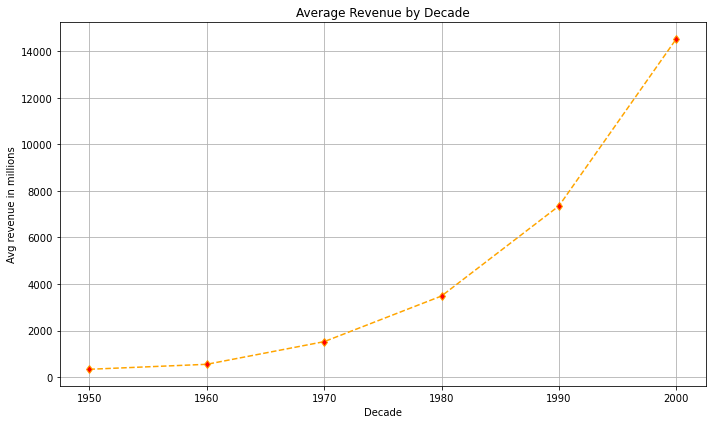

In [235]:
plt.figure(figsize=(10,6))
plt.plot(avg_rev_decade.index, avg_rev_decade.values, marker='d', markerfacecolor = 'Red', linestyle='--', color='Orange')
plt.title('Average Revenue by Decade')
plt.xlabel('Decade')
plt.ylabel('Avg revenue in millions')
plt.tight_layout()
plt.grid(True)
plt.show()

Line plot made for simple visualization of data with some colors to